In [77]:
import pandas as pd
import numpy as np
from pandas_profiling import ProfileReport
import sklearn
import pickle

import seaborn as sns

import matplotlib.pyplot as plt

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report

## Raw data collection and processing into pandas data frame

In [78]:
df = pd.read_csv("Loan_Default.csv")

## Do profiling to get overall idea about the data distribution

In [79]:
#prof = ProfileReport(df, title = 'Loan Dataset', explorative = True)

#prof.to_file('my_report.html')


## Remove ID and year columns since ID is just unique identifier, and year is 2019 for all

In [80]:

df = df.drop('ID', axis=1)
df = df.drop('year', axis=1)

## Checking for missing values from columns

In [81]:
df = df.dropna(axis = 1)

## Checking for rows with missing values in the columns

In [82]:
df = df.dropna(axis = 0)

## Checking if dataset has duplicates rows and droping them


In [83]:
df = df.drop_duplicates()

## Inorder to have data consistency converting the 'Region' column to have lowercase values

In [84]:
df['Region'] = df['Region'].str.lower()

# df.head()

## The dataset has incorrect spelling for the the column 'Security_Type' - correcting this


In [85]:

df['Region'] = df['Region'].replace('indriect','indirect')

# df.columns

## Scaling the 'property_value' in the dataset to optimise the results


In [86]:
df[['loan_amount']] = StandardScaler().fit_transform(df[['loan_amount']])


# df.head()

## Define numeric data types

In [87]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

## Checking for outliers

In [88]:
for i in df.select_dtypes(include=numerics).columns:
    mean = np.mean(df.select_dtypes(include=numerics)[i], axis=0)
    sd = np.std(df.select_dtypes(include=numerics)[i], axis=0)
    if i in ['ID']:
        continue
    lt = mean - 3 * sd
    rt = mean + 3 * sd
    col = i
    df = df.query(("{0} >= @lt & {0} <= @rt".format(col)))

print(df.shape)

(141942, 18)


## Correlation Heatmap

/tmp/ipykernel_16965/621126171.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


<AxesSubplot: >

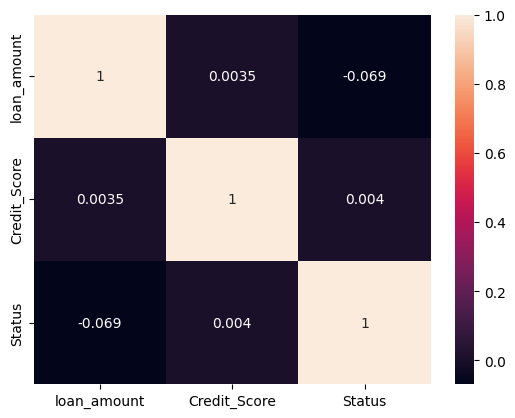

In [89]:
sns.heatmap(df.corr(), annot=True)

## Changing total_units from string format as 1U, 2U ... to 1, 2

In [90]:
df['total_units'] = df['total_units'].astype(str).str.replace('U', '').astype(int)
print(df.shape)

(141942, 18)


## Logic to print graphs in groups of size of mx

In [91]:
grp = 0
mx = 4
done = []

In [92]:
# plot every feature
def categorical_feature_plot_with_target(feature):
    plt.figure(figsize=(10, 3))
    ax = sns.catplot(x='Status', col=feature, kind='count', data=df, palette="cool_r");
    # ax.xaxis.set_label_position('top')
    for ax in ax.axes.ravel():
        for p in ax.patches:
            ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
    ax.set_title(f"Distribution of feature {feature} wrt Output", y = 1.1, loc = 'left')



## Skip the below columns to plot because of high cardinality leading to higher cognitive overload

In [93]:
skip = ['loan_amount', 'Credit_Score', 'Status']

## for every mx number of columns, plot the box

<Figure size 1000x300 with 0 Axes>

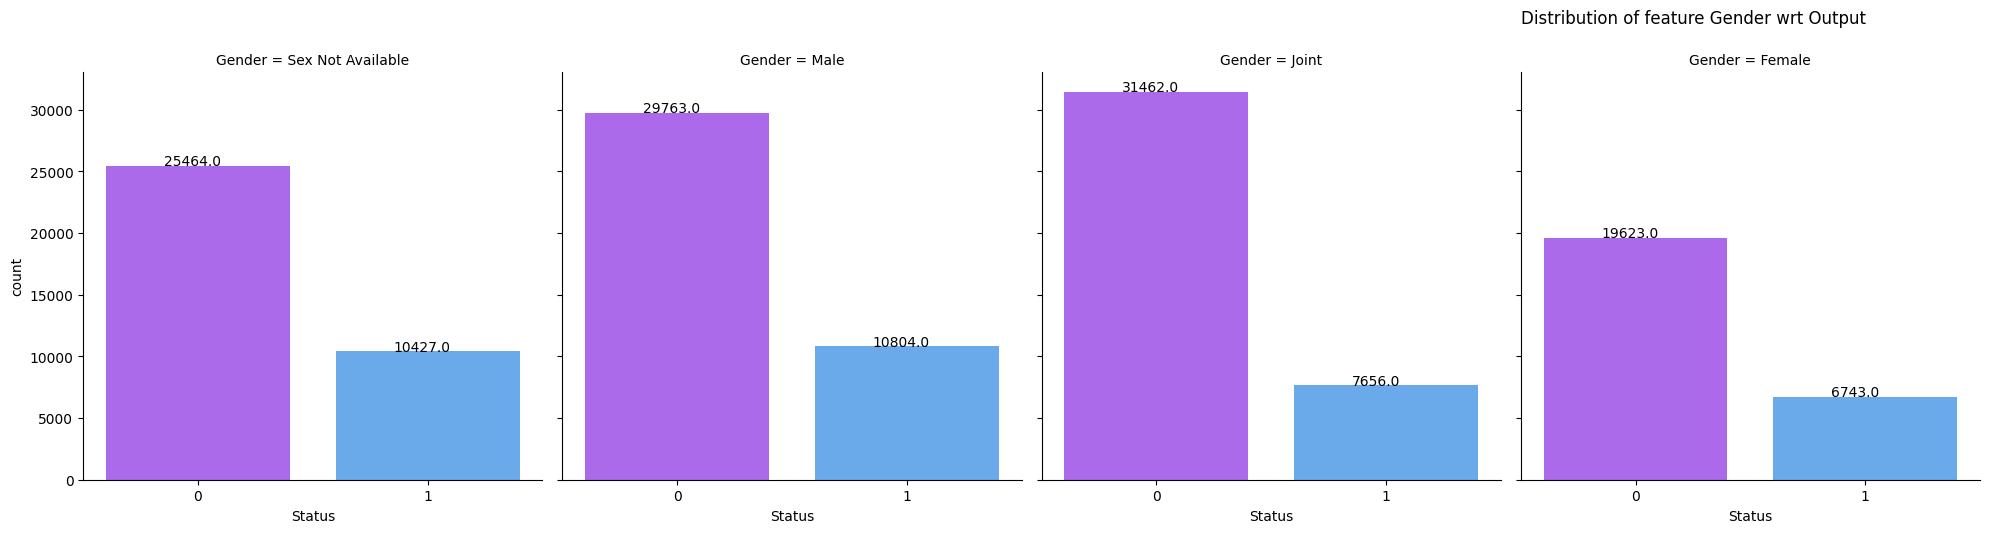

<Figure size 1000x300 with 0 Axes>

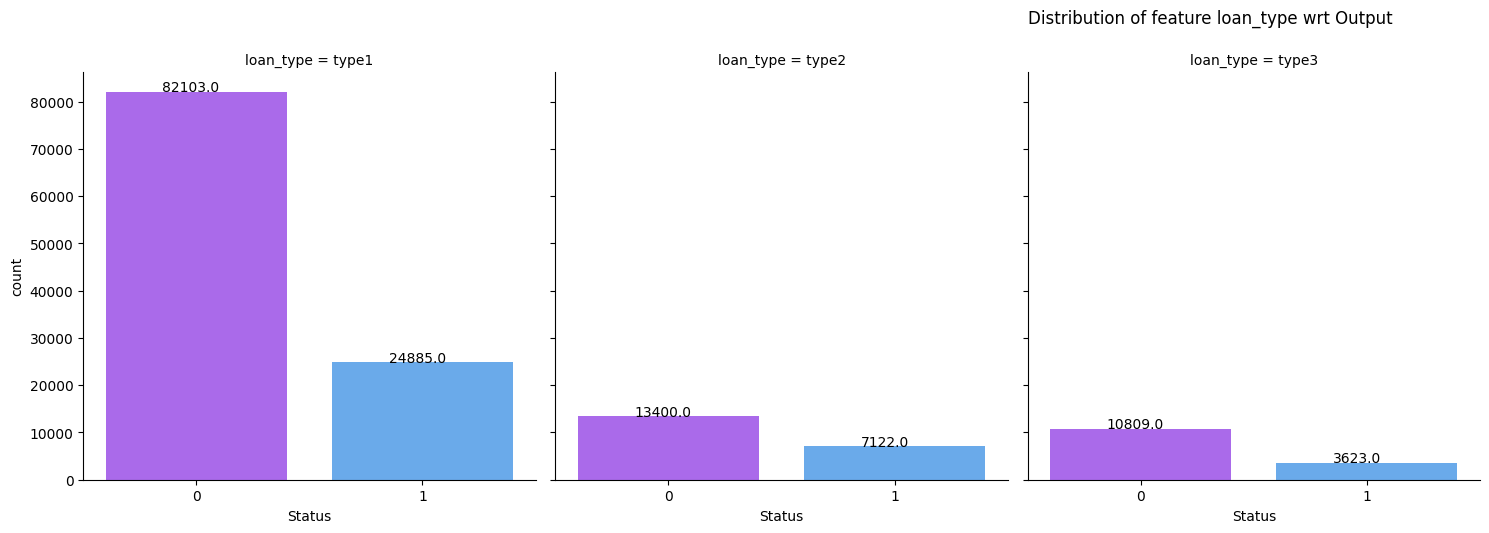

<Figure size 1000x300 with 0 Axes>

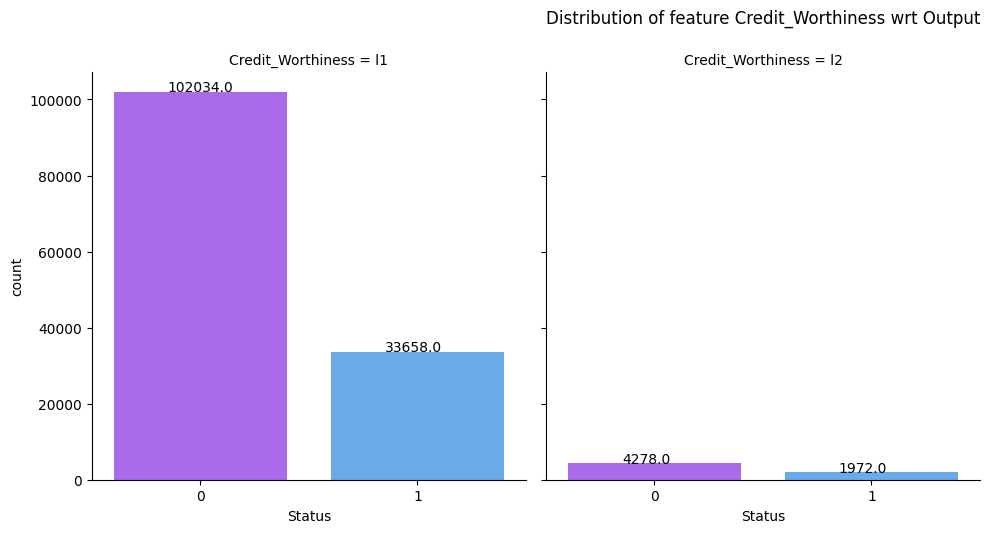

<Figure size 1000x300 with 0 Axes>

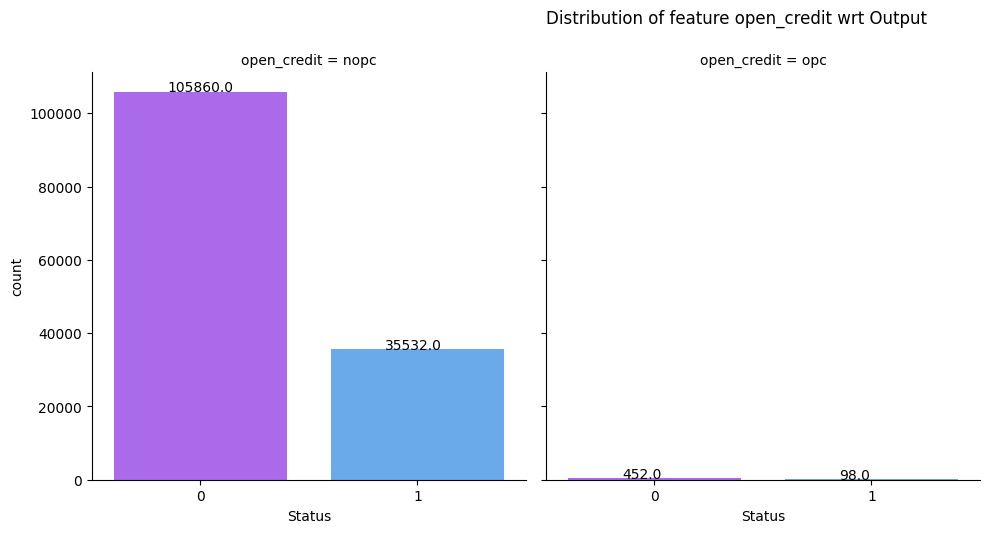

In [94]:
for i in df.columns:
    if i in skip or i in done:
        continue
    done.append(i)
    grp += 1
    categorical_feature_plot_with_target(i)
    if grp == mx:
        grp = 0
        break

<Figure size 1000x300 with 0 Axes>

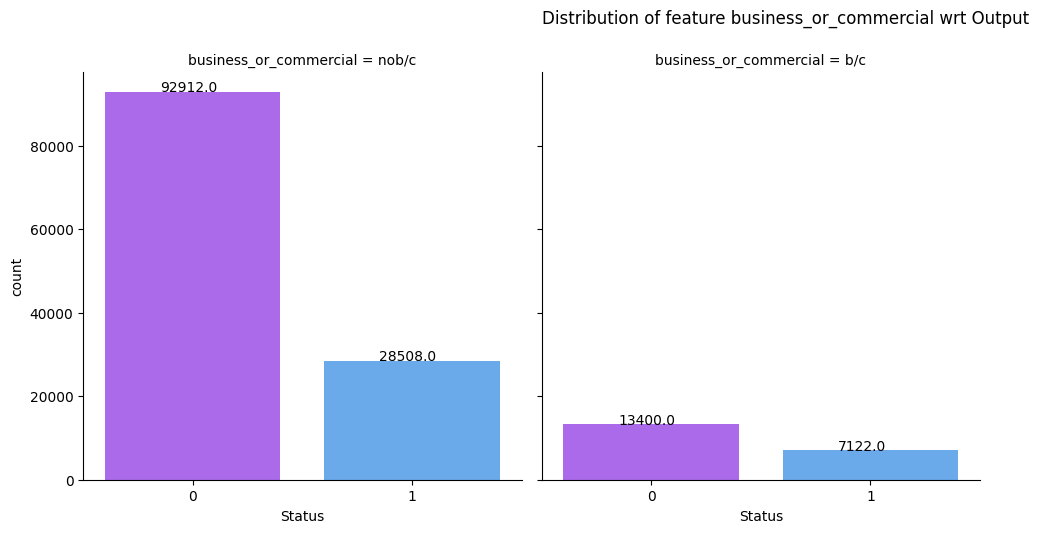

<Figure size 1000x300 with 0 Axes>

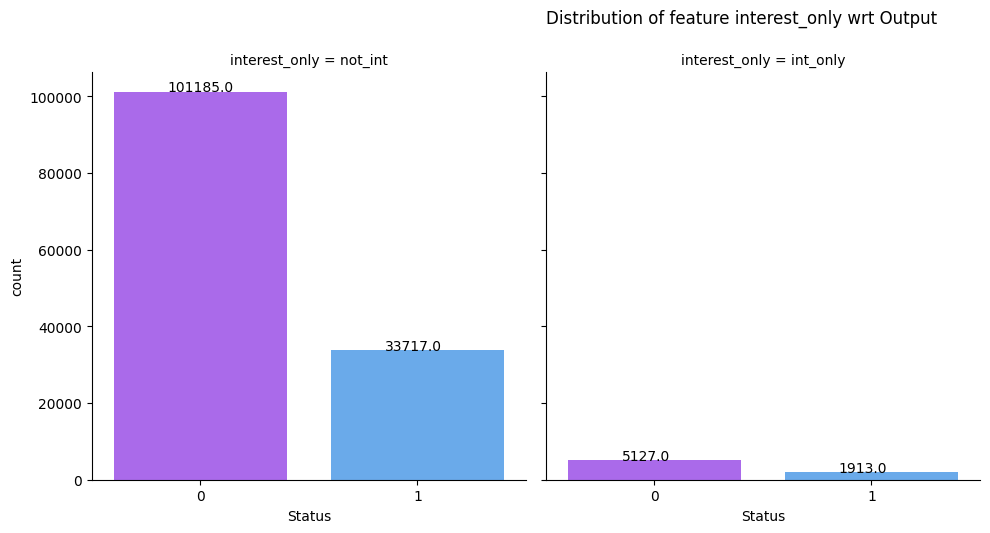

<Figure size 1000x300 with 0 Axes>

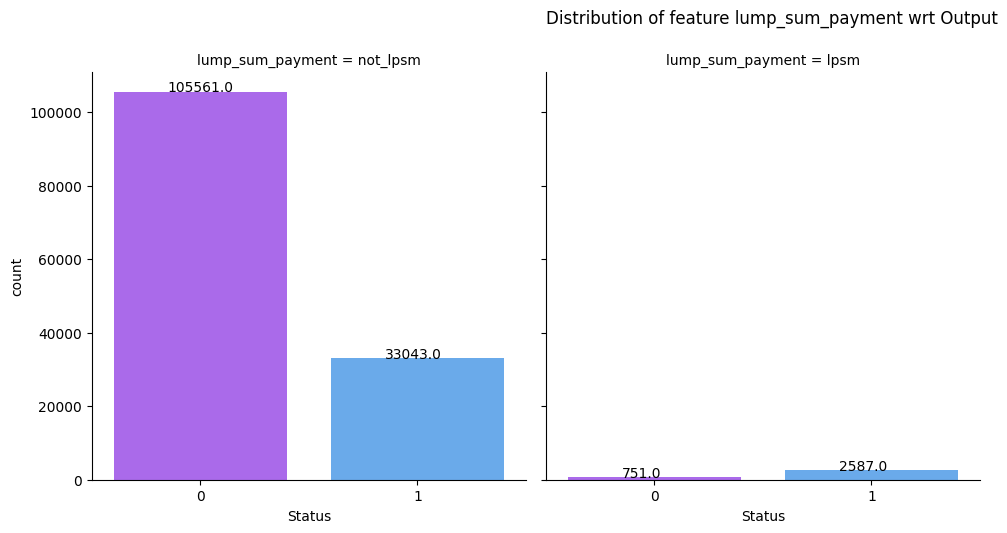

<Figure size 1000x300 with 0 Axes>

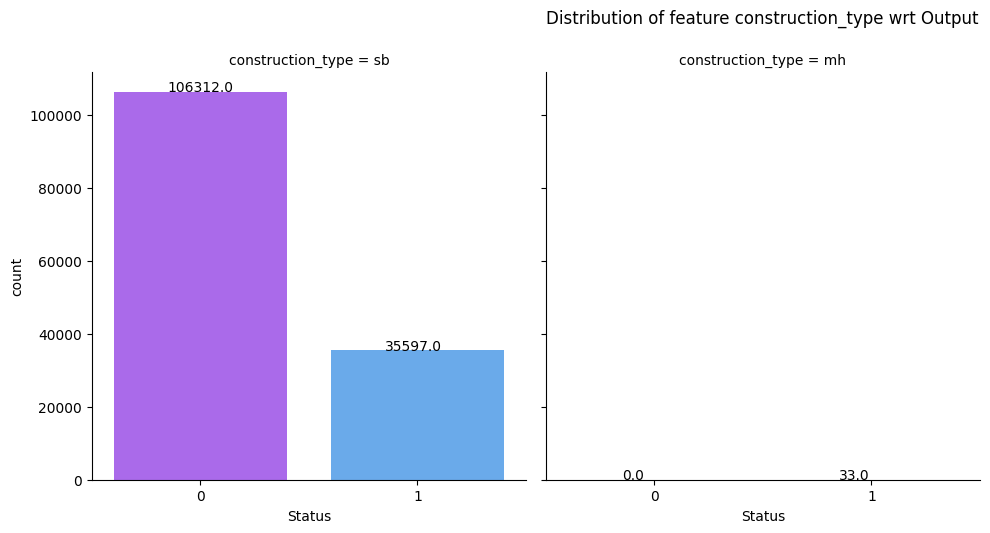

In [95]:
for i in df.columns:
    if i in skip or i in done:
        continue
    done.append(i)
    grp += 1
    categorical_feature_plot_with_target(i)
    if grp == mx:
        grp = 0
        break
# format validation

<Figure size 1000x300 with 0 Axes>

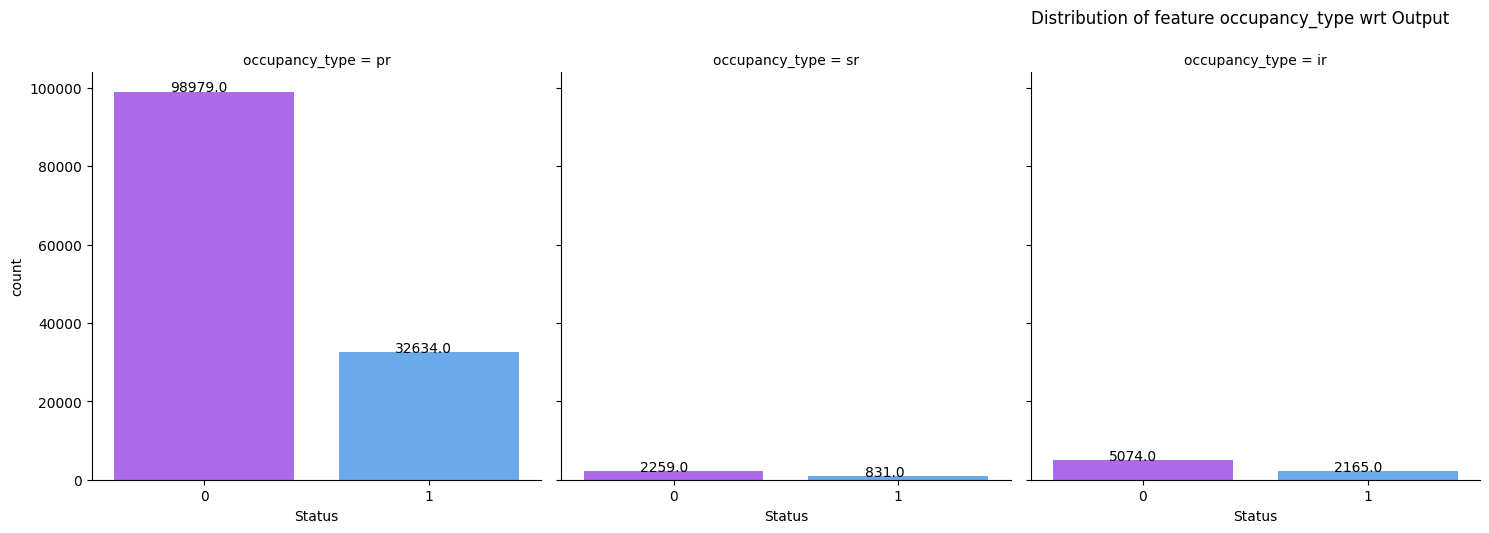

<Figure size 1000x300 with 0 Axes>

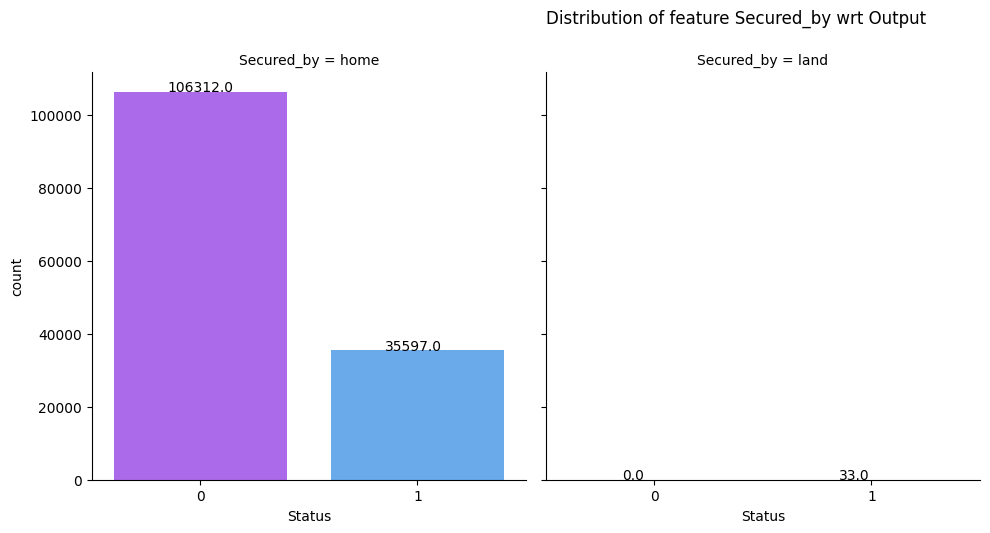

<Figure size 1000x300 with 0 Axes>

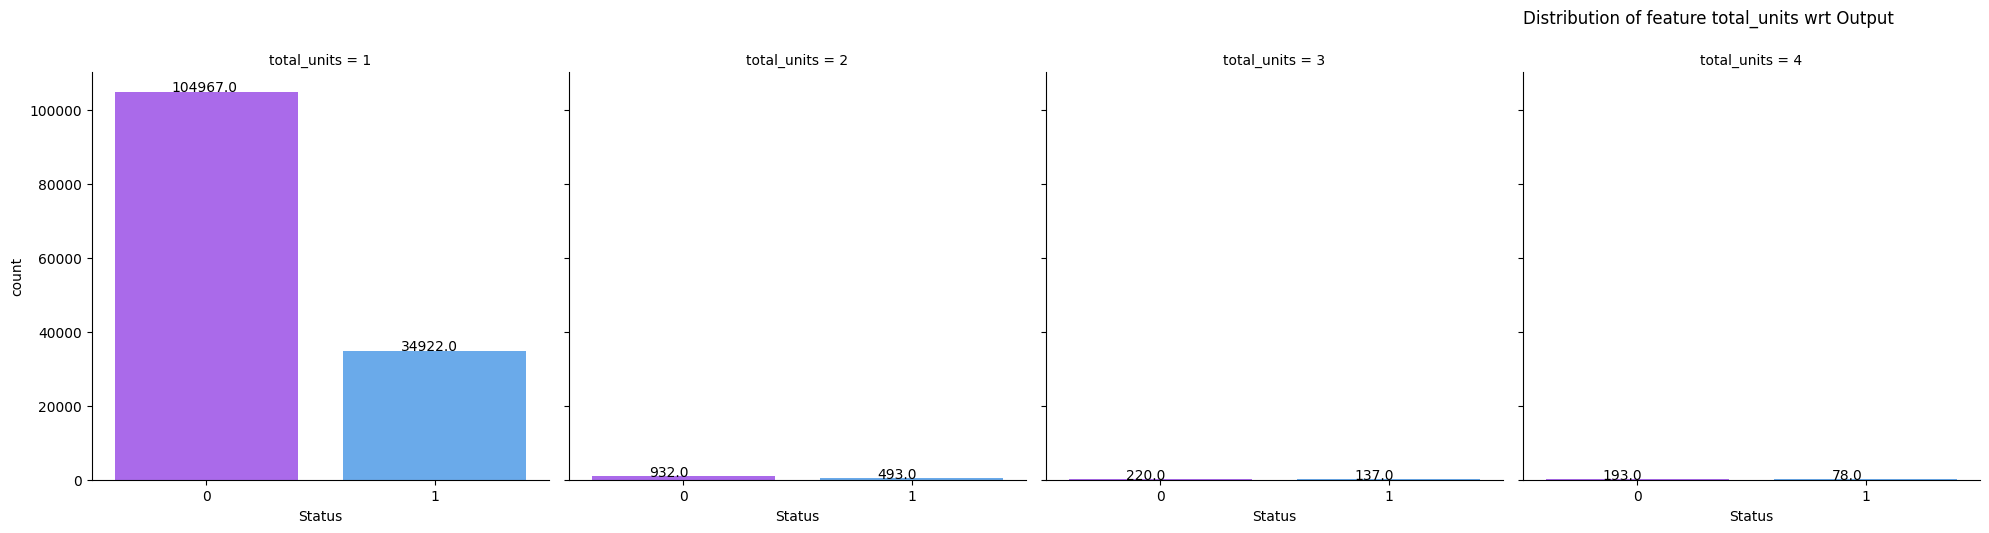

<Figure size 1000x300 with 0 Axes>

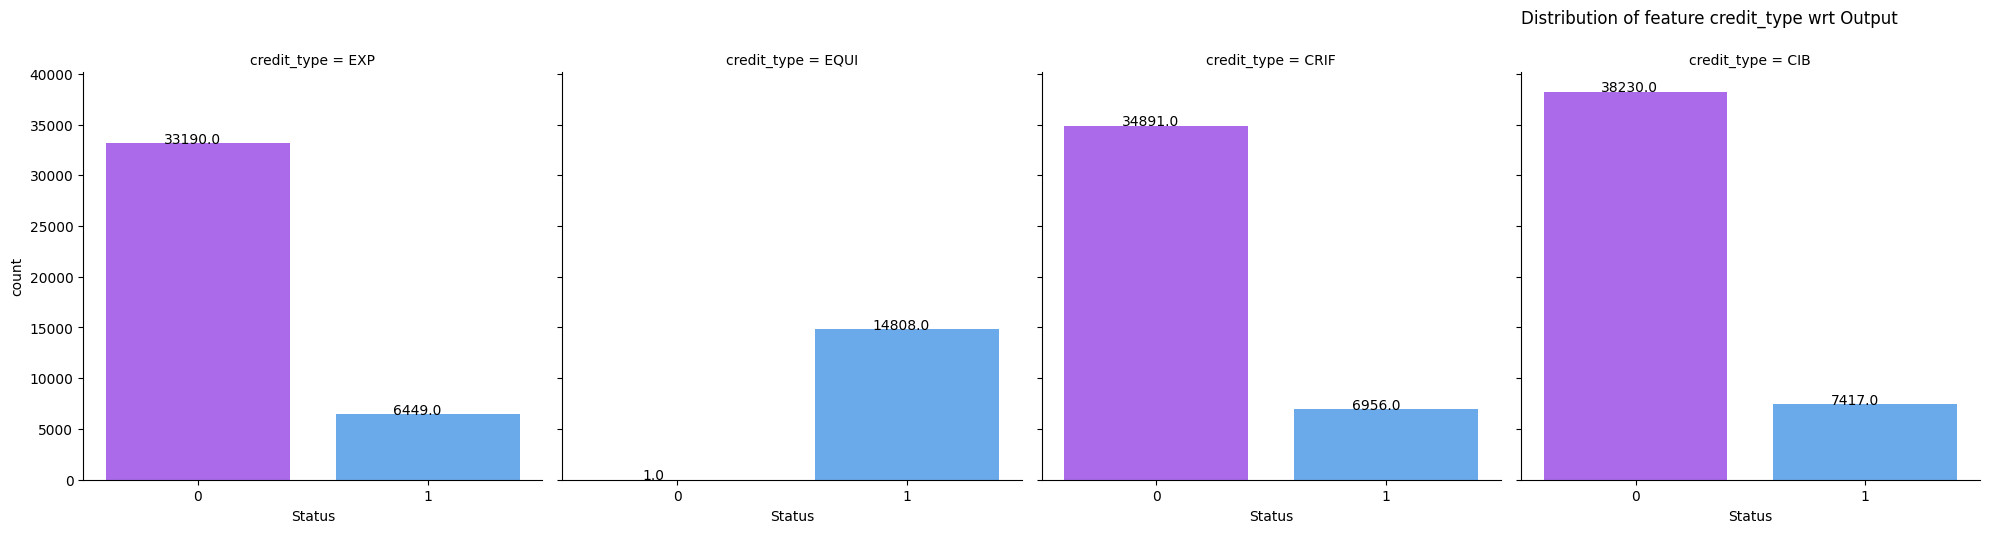

In [96]:
for i in df.columns:
    if i in skip or i in done:
        continue
    done.append(i)
    grp += 1
    categorical_feature_plot_with_target(i)
    if grp == mx:
        grp = 0
        break


<Figure size 1000x300 with 0 Axes>

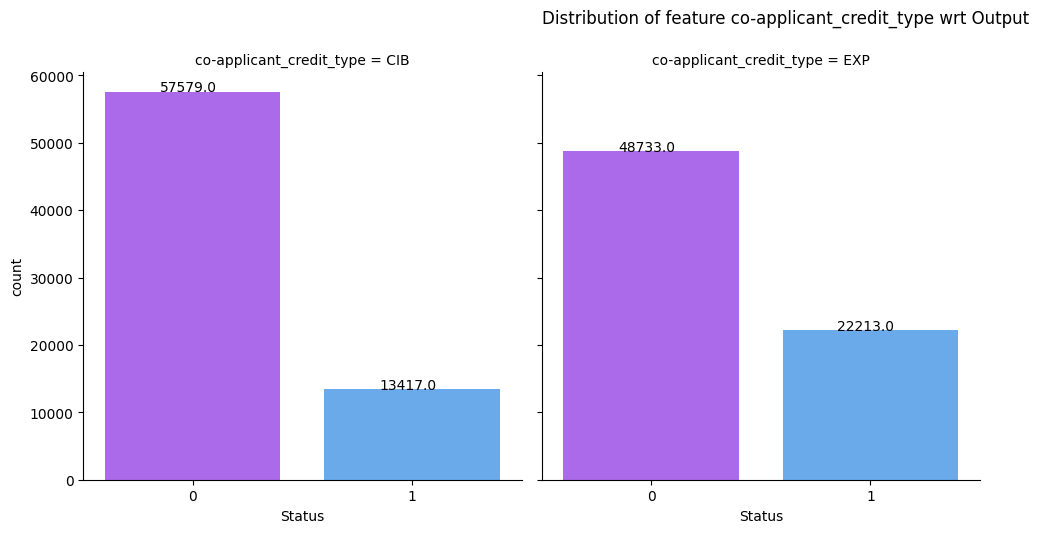

<Figure size 1000x300 with 0 Axes>

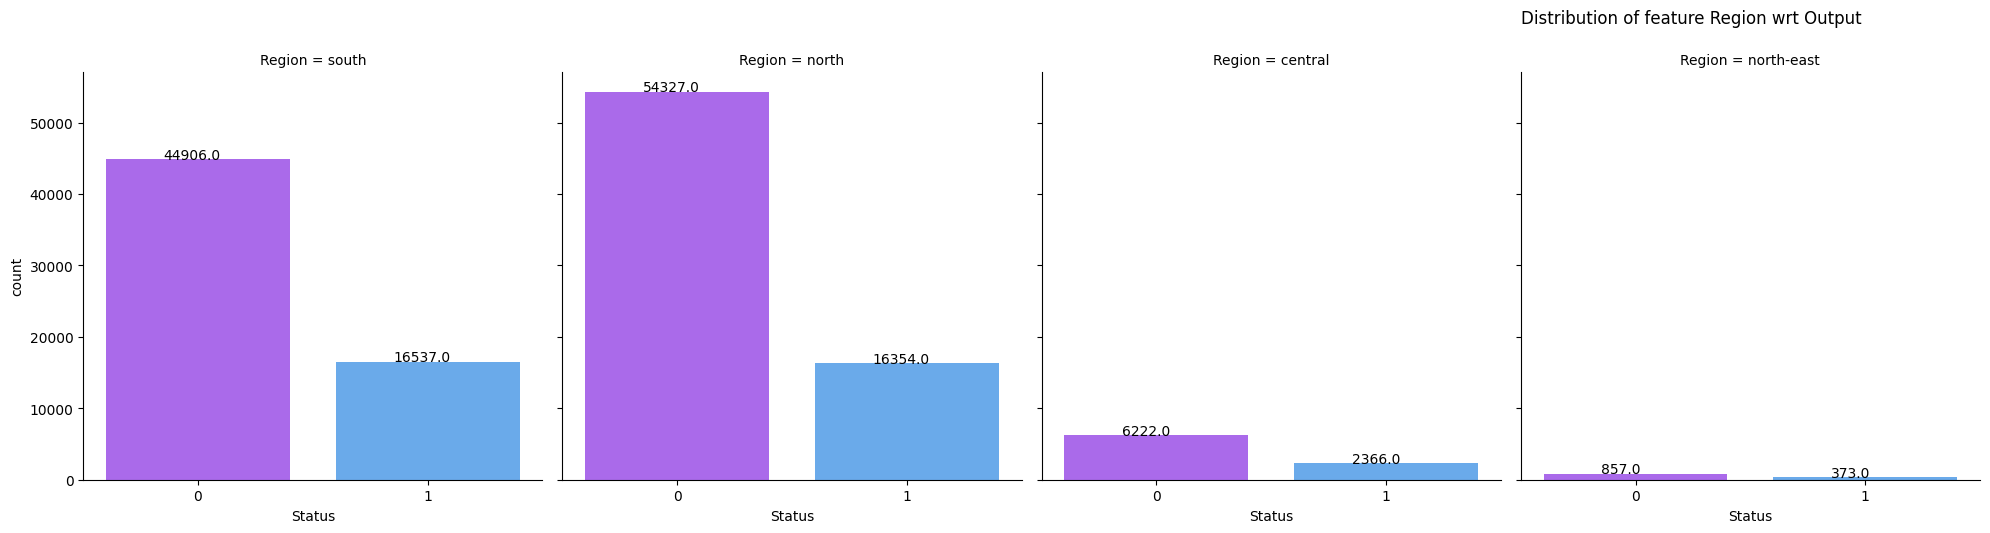

<Figure size 1000x300 with 0 Axes>

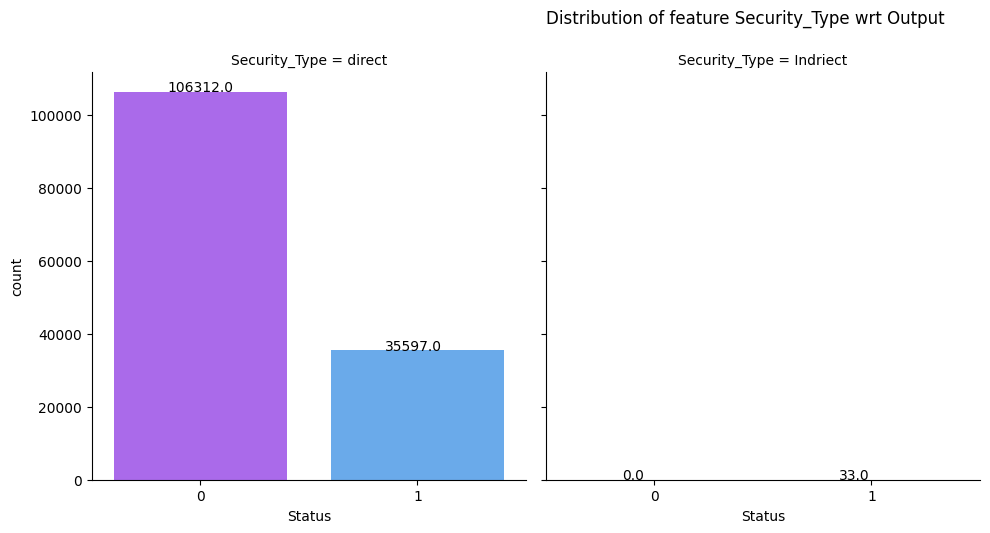

In [97]:
for i in df.columns:
    if i in skip or i in done:
        continue
    done.append(i)
    grp += 1
    categorical_feature_plot_with_target(i)
    if grp == mx:
        grp = 0
        break

## Bar plot against Status 0

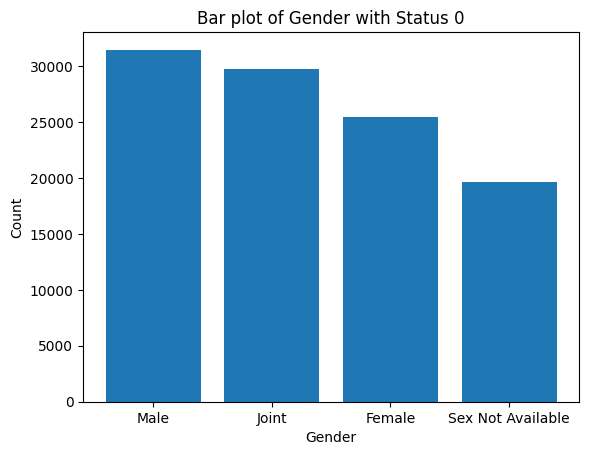

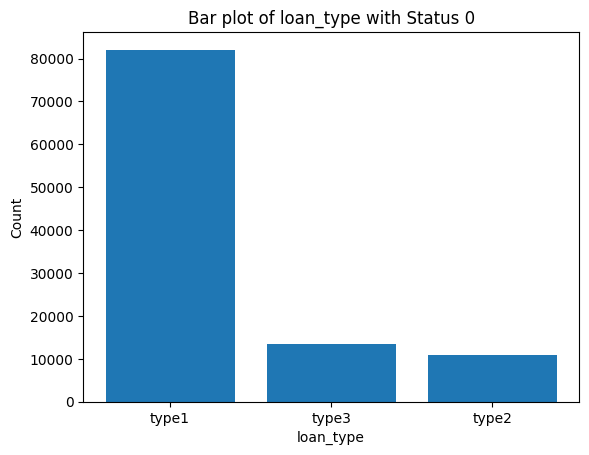

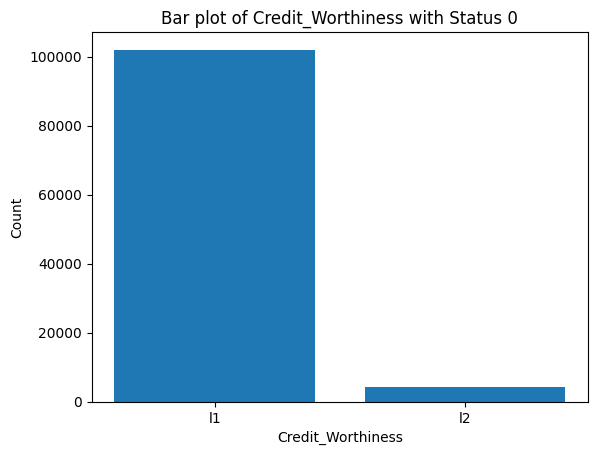

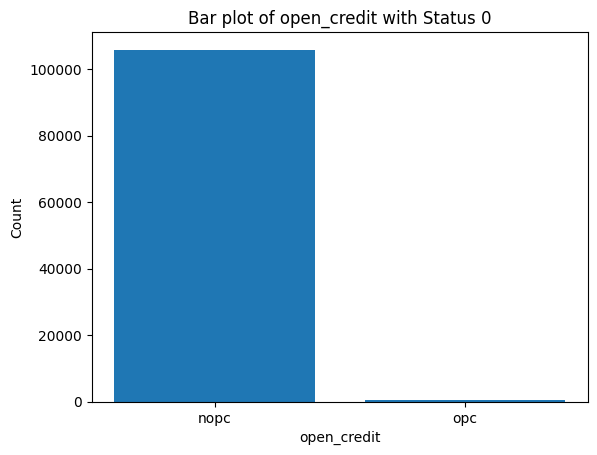

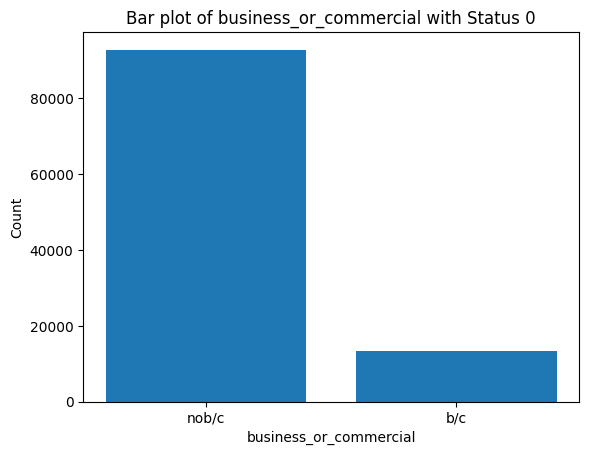

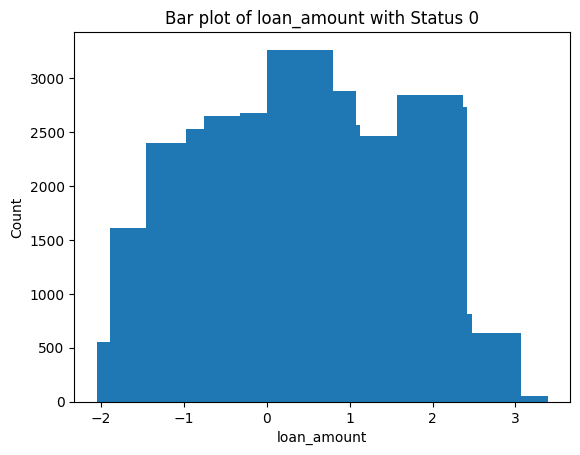

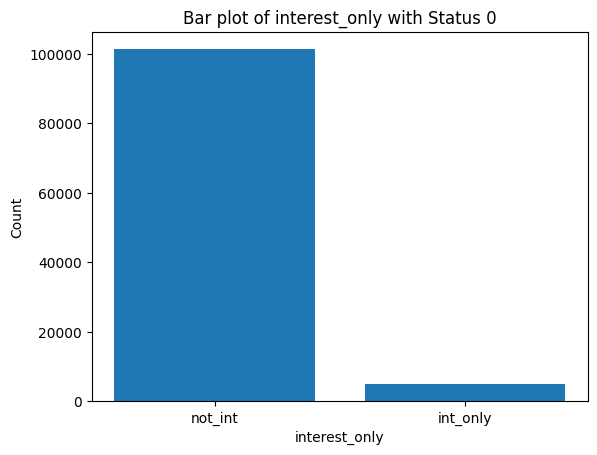

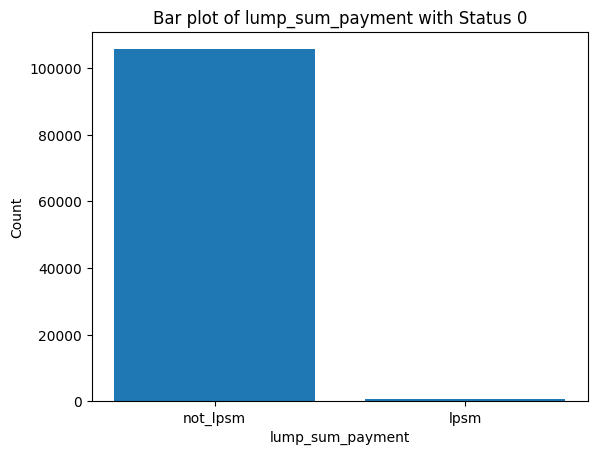

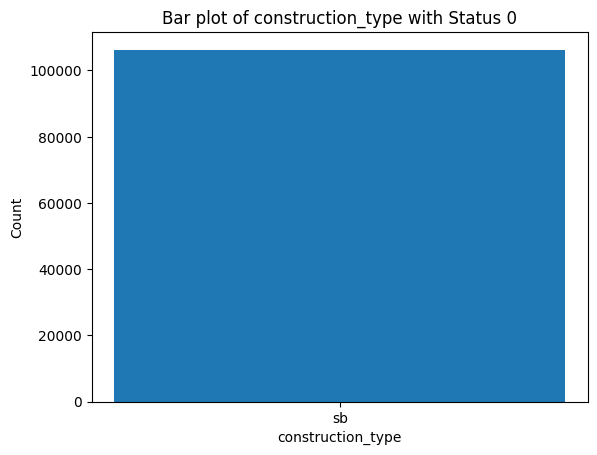

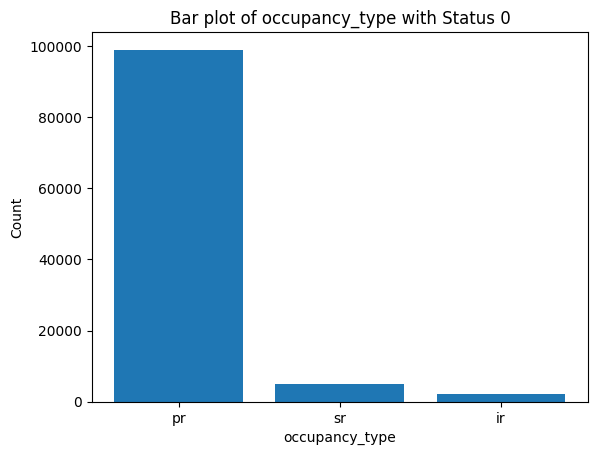

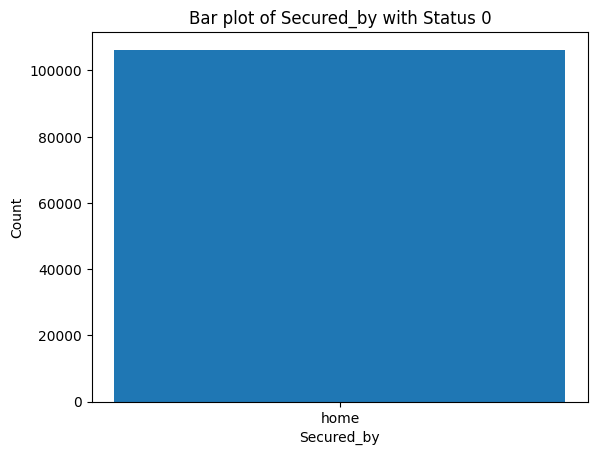

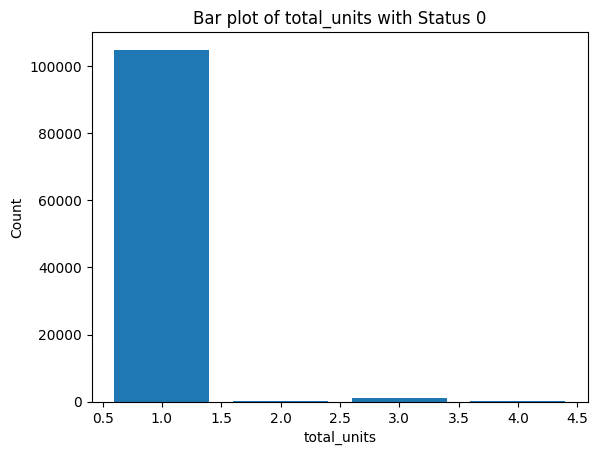

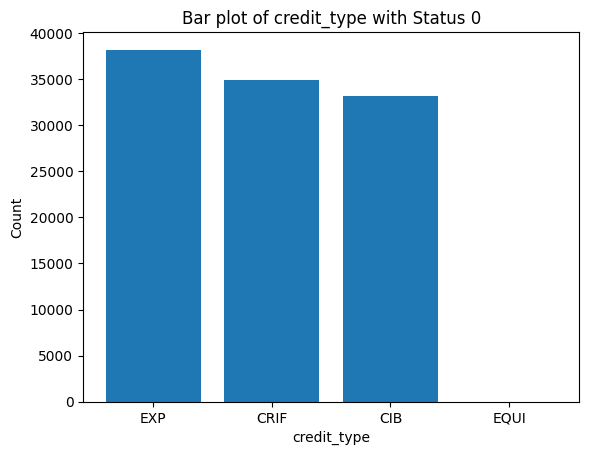

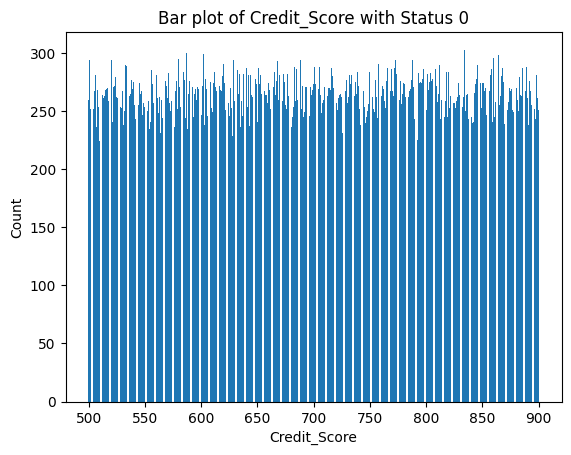

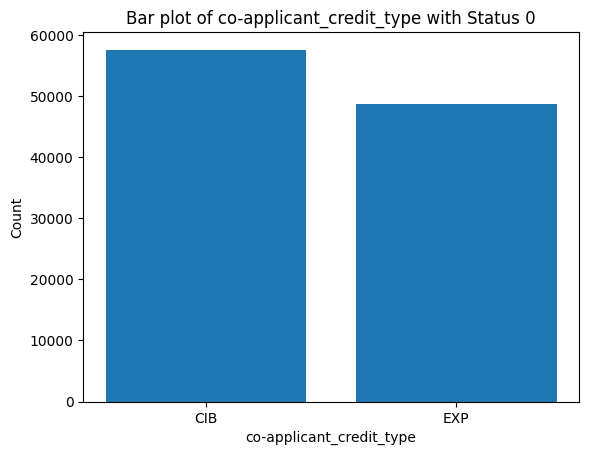

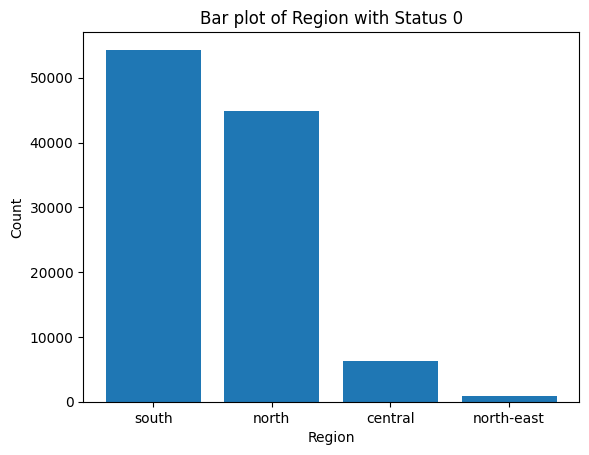

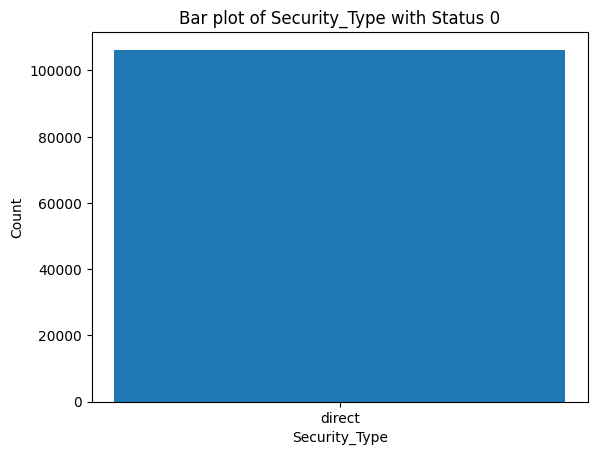

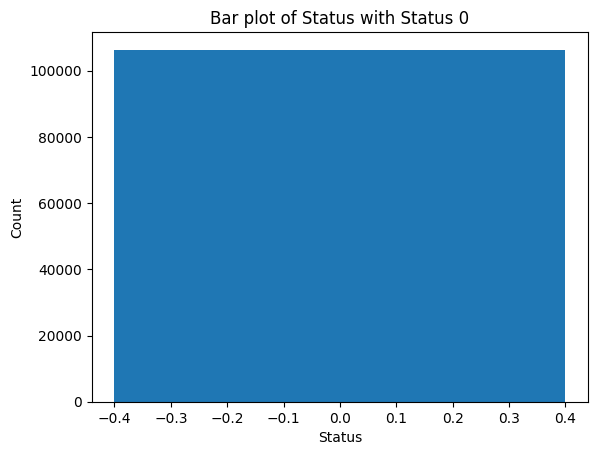

In [98]:
status0 = df[df['Status'] == 0]
for i in status0.columns:
    plt.bar(status0[i].unique(), status0[i].value_counts())
    plt.xlabel(i)
    plt.ylabel('Count')
    plt.title('Bar plot of ' + i + ' with Status 0')
    plt.show()









## Bar plot against Status 1

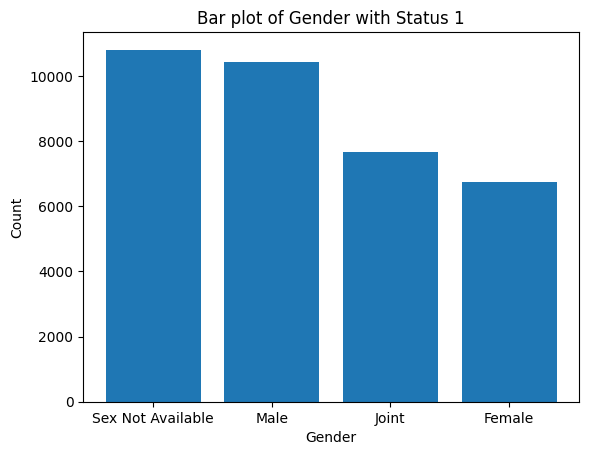

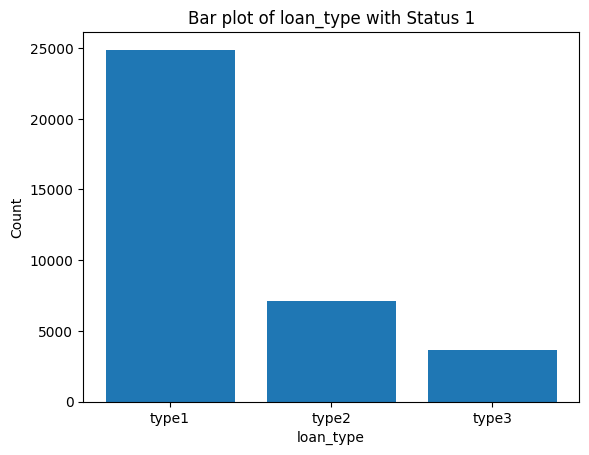

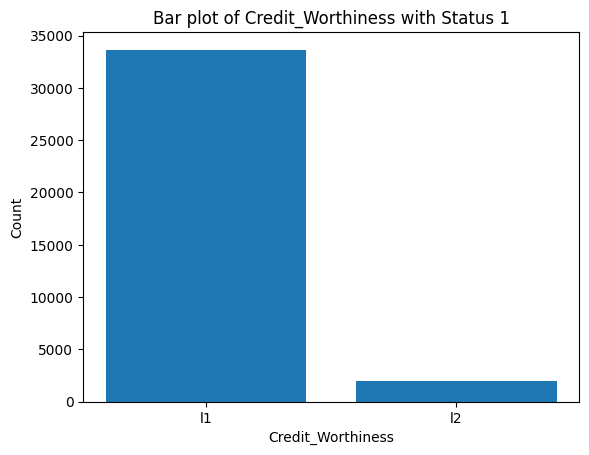

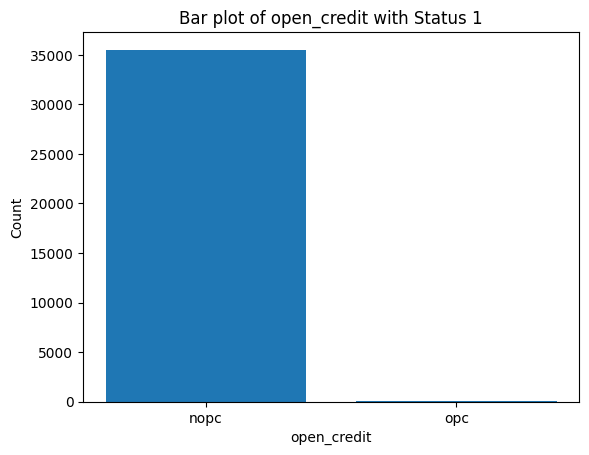

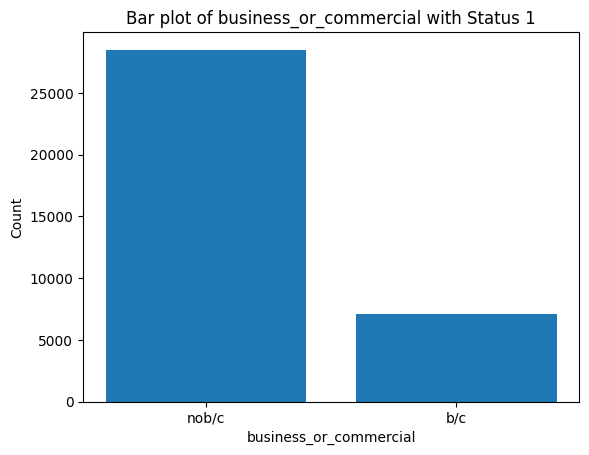

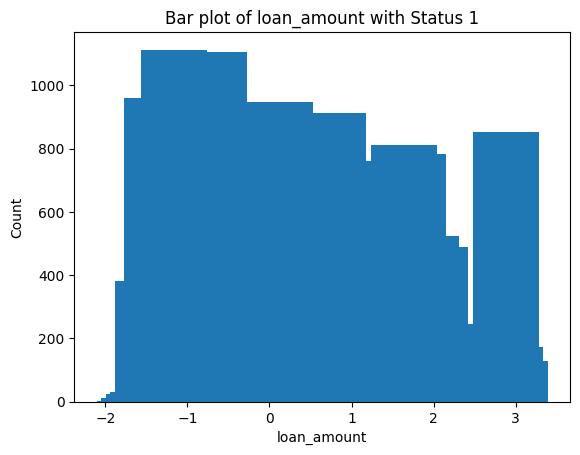

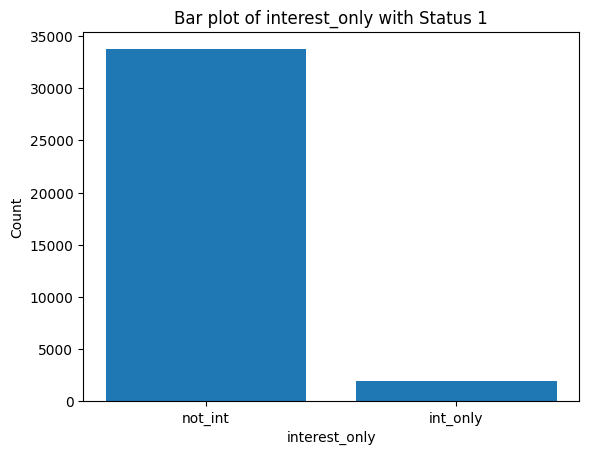

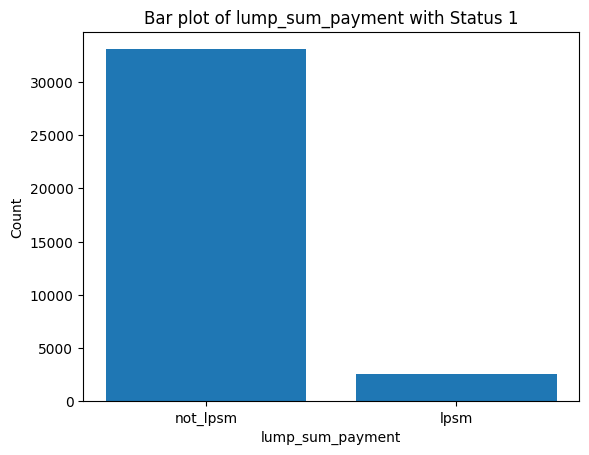

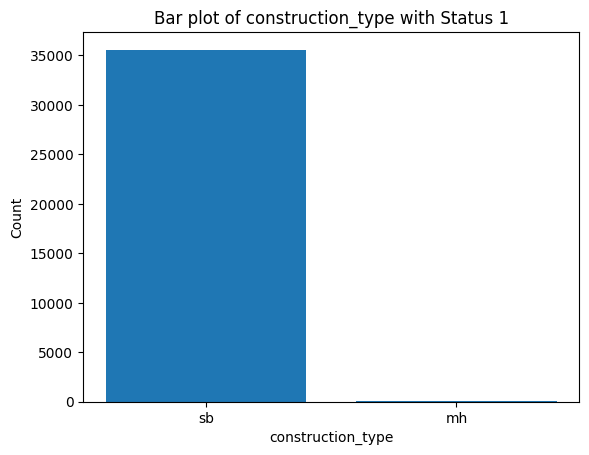

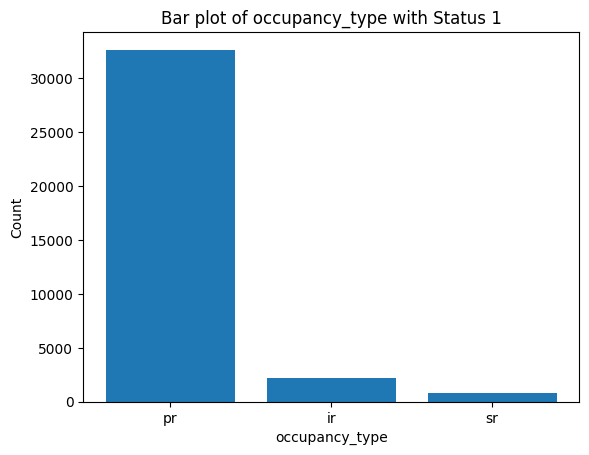

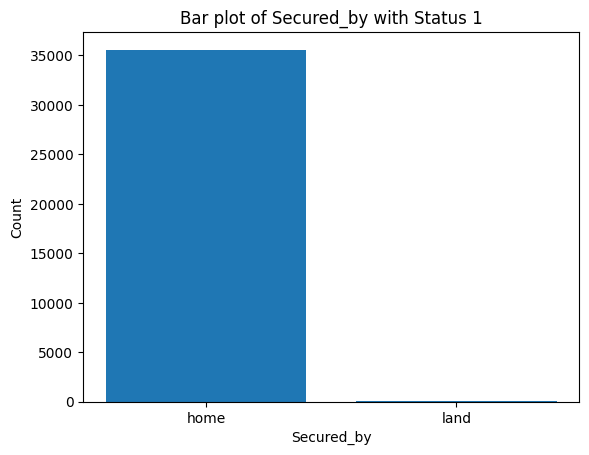

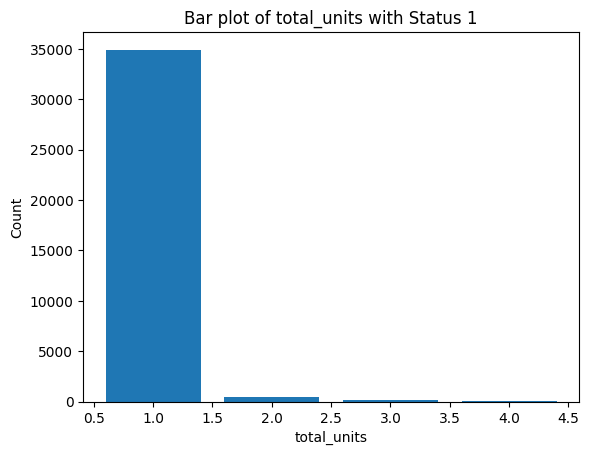

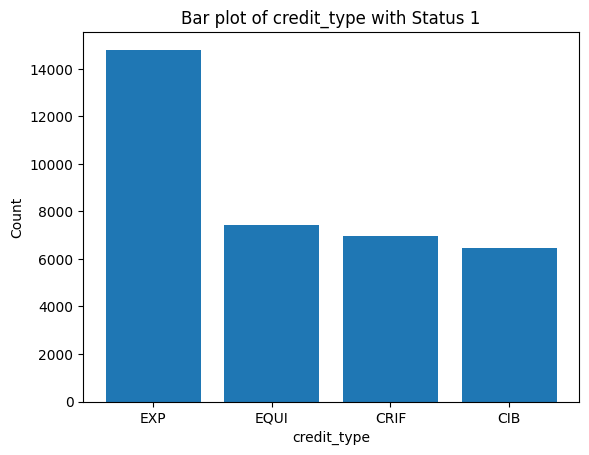

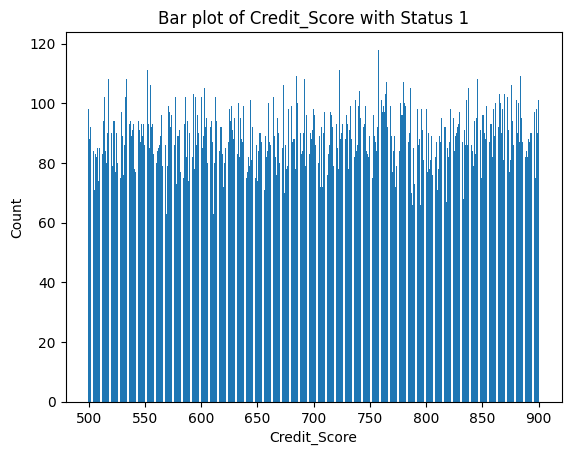

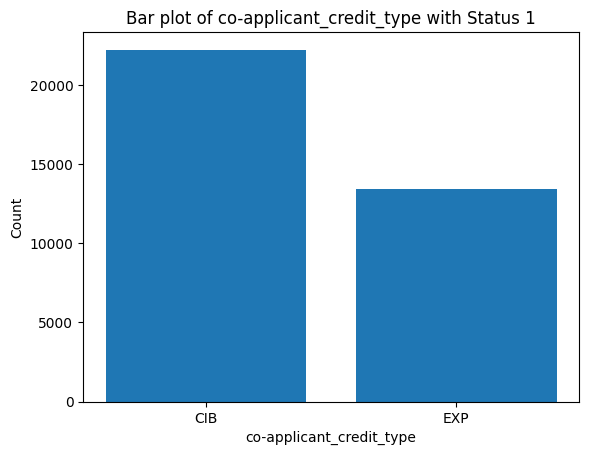

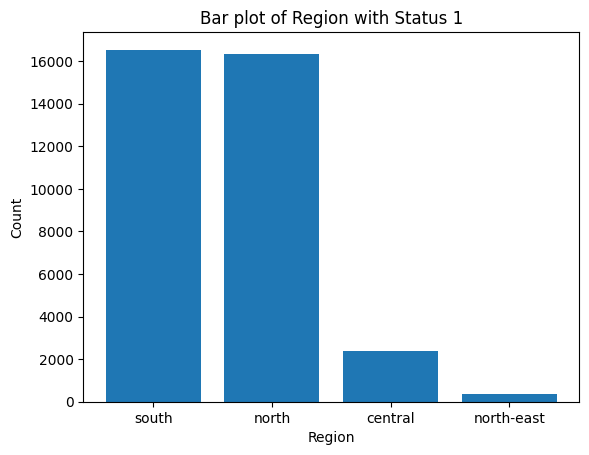

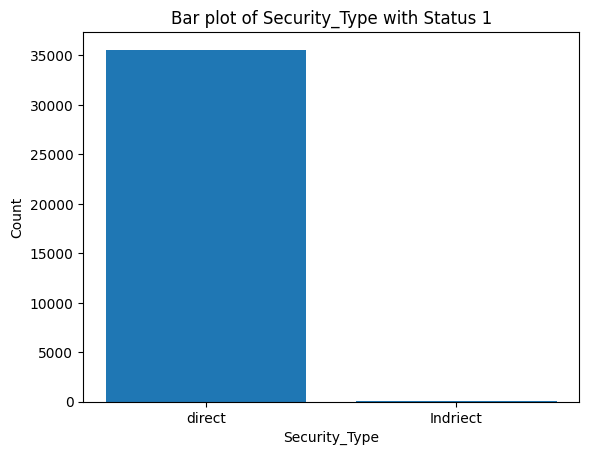

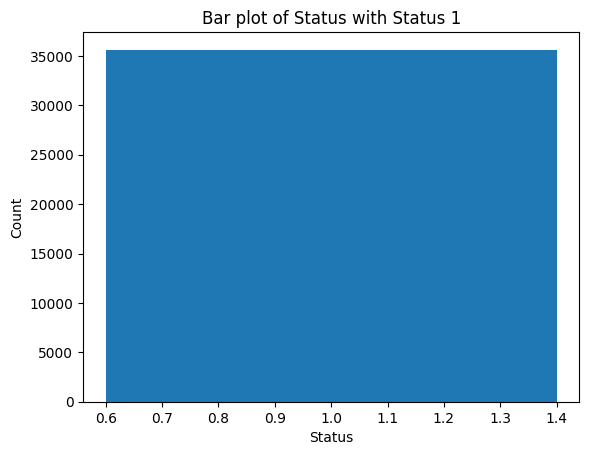

In [99]:
status1 = df[df['Status'] == 1]
for i in status1.columns:
    plt.bar(status1[i].unique(), status1[i].value_counts())
    plt.xlabel(i)
    plt.ylabel('Count')
    plt.title('Bar plot of ' + i + ' with Status 1')
    plt.show()


## Pair Plot

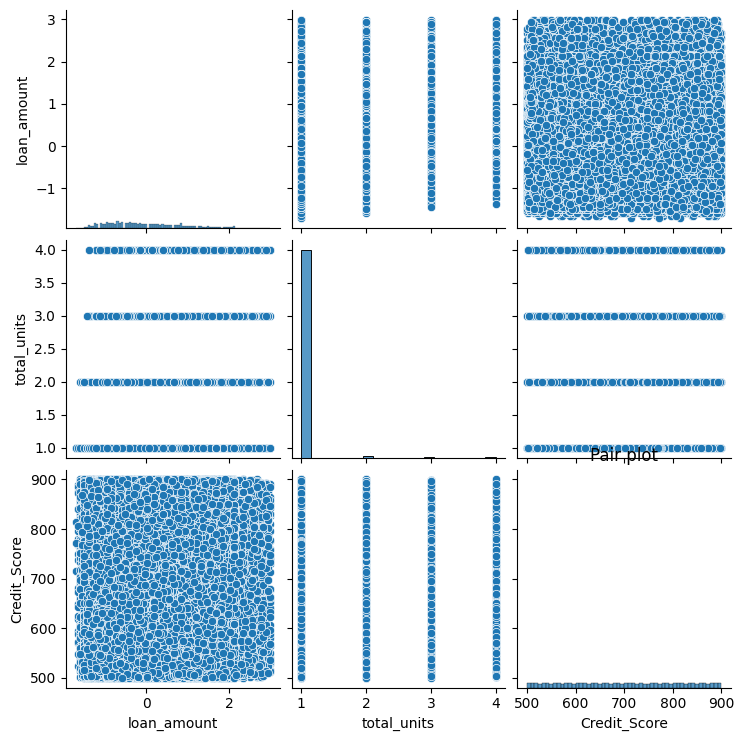

In [100]:
sns.pairplot(df.drop(['Status'], axis=1))
plt.title('Pair plot')
plt.show()


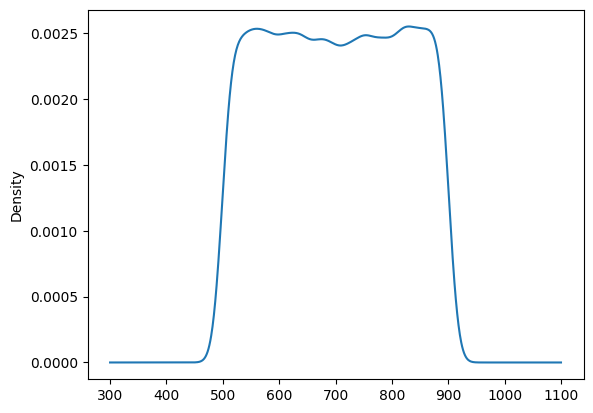

In [101]:

status1 = df[df['Status'] == 1]
s = pd.Series(status1['Credit_Score'], name = 'as')
ax = s.plot.kde()


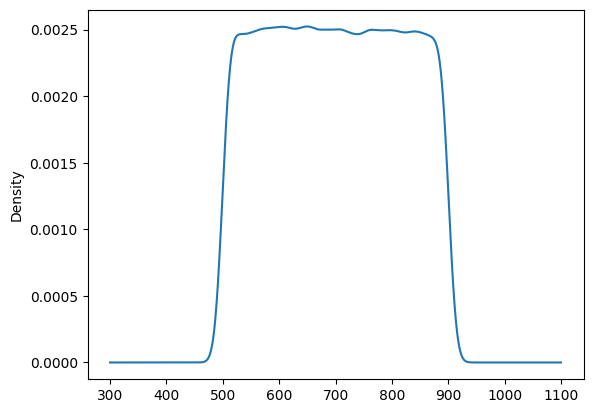

In [102]:

status1 = df[df['Status'] == 0]
s = pd.Series(status1['Credit_Score'], name = 'as')
ax = s.plot.kde()


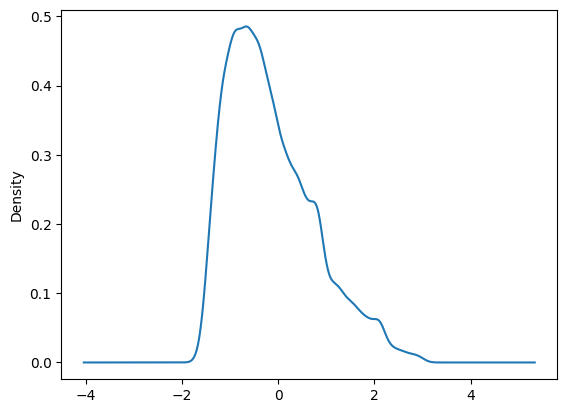

In [103]:

status1 = df[df['Status'] == 1]
s = pd.Series(status1['loan_amount'])
ax = s.plot.kde()

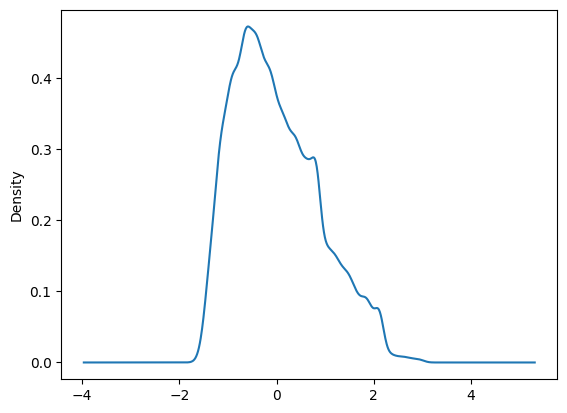

In [104]:

status1 = df[df['Status'] == 0]
s = pd.Series(status1['loan_amount'])
ax = s.plot.kde()

In [105]:
#df.to_csv('final_dataset.csv')

df.columns

Index(['Gender', 'loan_type', 'Credit_Worthiness', 'open_credit',
       'business_or_commercial', 'loan_amount', 'interest_only',
       'lump_sum_payment', 'construction_type', 'occupancy_type', 'Secured_by',
       'total_units', 'credit_type', 'Credit_Score',
       'co-applicant_credit_type', 'Region', 'Security_Type', 'Status'],
      dtype='object')

In [106]:
#Encoding the categorical variables

In [107]:
#Seperating the categorical and numerical columns based on the datatype

datatype = pd.DataFrame(df.dtypes).reset_index()
#print(datatype)
categorical = []
numerical = []
for i, j in zip(datatype['index'], datatype[0]):
    if j == 'object':
        categorical.append(i)
        
    else:
        numerical.append(i)
        
        
print(categorical)

print(numerical)

# Binary variables
binary_variables = ['Security_Type', 'co-applicant_credit_type', 'Secured_by',
               'lump_sum_payment', 'interest_only', 'construction_type', 'business_or_commercial',
               'open_credit', 'Credit_Worthiness','Status']


['Gender', 'loan_type', 'Credit_Worthiness', 'open_credit', 'business_or_commercial', 'interest_only', 'lump_sum_payment', 'construction_type', 'occupancy_type', 'Secured_by', 'credit_type', 'co-applicant_credit_type', 'Region', 'Security_Type']
['loan_amount', 'total_units', 'Credit_Score', 'Status']


In [108]:
binary_variables

['Security_Type',
 'co-applicant_credit_type',
 'Secured_by',
 'lump_sum_payment',
 'interest_only',
 'construction_type',
 'business_or_commercial',
 'open_credit',
 'Credit_Worthiness',
 'Status']

In [109]:
df.columns

Index(['Gender', 'loan_type', 'Credit_Worthiness', 'open_credit',
       'business_or_commercial', 'loan_amount', 'interest_only',
       'lump_sum_payment', 'construction_type', 'occupancy_type', 'Secured_by',
       'total_units', 'credit_type', 'Credit_Score',
       'co-applicant_credit_type', 'Region', 'Security_Type', 'Status'],
      dtype='object')

In [110]:
df[binary_variables]

,Security_Type,co-applicant_credit_type,Secured_by,lump_sum_payment,interest_only,construction_type,business_or_commercial,open_credit,Credit_Worthiness,Status
0,direct,CIB,home,not_lpsm,not_int,sb,nob/c,nopc,l1,1
1,direct,EXP,home,lpsm,not_int,sb,b/c,nopc,l1,1
2,direct,CIB,home,not_lpsm,not_int,sb,nob/c,nopc,l1,0
3,direct,CIB,home,not_lpsm,not_int,sb,nob/c,nopc,l1,0
4,direct,EXP,home,not_lpsm,not_int,sb,nob/c,nopc,l1,0
...,...,...,...,...,...,...,...,...,...,...
148665,direct,EXP,home,not_lpsm,not_int,sb,nob/c,nopc,l1,0
148666,direct,CIB,home,not_lpsm,not_int,sb,nob/c,nopc,l1,0
148667,direct,EXP,home,not_lpsm,not_int,sb,nob/c,nopc,l1,0
148668,direct,EXP,home,not_lpsm,not_int,sb,nob/c,nopc,l1,0


In [111]:
categorical

['Gender',
 'loan_type',
 'Credit_Worthiness',
 'open_credit',
 'business_or_commercial',
 'interest_only',
 'lump_sum_payment',
 'construction_type',
 'occupancy_type',
 'Secured_by',
 'credit_type',
 'co-applicant_credit_type',
 'Region',
 'Security_Type']

In [112]:
BinaryEncoder = LabelEncoder()

#for i in binary_variables:
    #df[i] = labelEncoder.fit_transform(df[i])

BinaryEncoder.fit

<bound method LabelEncoder.fit of LabelEncoder()>

In [113]:
#labelEncoder = LabelEncoder()

#for i in binary_variables:
   # df[i] = labelEncoder.fit_transform(df[i])


# df.columns
# print("after cols")
df_categorical = df[categorical]
#df_categorical.drop(columns=binary_variables,axis = 1, inplace=True)

df_categorical.columns

#Using one hot encoding

oneHotEncoder_categorical = OneHotEncoder()
df_onehot = oneHotEncoder_categorical.fit_transform(df_categorical)
df_enc_categorical = pd.DataFrame(df_onehot.toarray())


# Column names
print(oneHotEncoder_categorical.categories_)

oneHotEncoder_categorical.categories_

cat_columns = ['Female', 'Joint', 'Male', 'Sex Not Available',
               'type1', 'type2', 'type3',
               'ir', 'pr', 'sr',
               'CIB', 'CRIF', 'EQUI', 'EXP',
               'north', 'north-east', 'central', 'south']

#df_enc_categorical.columns = cat_columns
df.drop(columns=df_categorical.columns, inplace=True)
# Concat
df_merged = pd.concat([df, df_enc_categorical], axis=1, join='inner')

print("done")

df_merged

df_merged.columns

[array(['Female', 'Joint', 'Male', 'Sex Not Available'], dtype=object), array(['type1', 'type2', 'type3'], dtype=object), array(['l1', 'l2'], dtype=object), array(['nopc', 'opc'], dtype=object), array(['b/c', 'nob/c'], dtype=object), array(['int_only', 'not_int'], dtype=object), array(['lpsm', 'not_lpsm'], dtype=object), array(['mh', 'sb'], dtype=object), array(['ir', 'pr', 'sr'], dtype=object), array(['home', 'land'], dtype=object), array(['CIB', 'CRIF', 'EQUI', 'EXP'], dtype=object), array(['CIB', 'EXP'], dtype=object), array(['central', 'north', 'north-east', 'south'], dtype=object), array(['Indriect', 'direct'], dtype=object)]
done


Index([ 'loan_amount',  'total_units', 'Credit_Score',       'Status',
                    0,              1,              2,              3,
                    4,              5,              6,              7,
                    8,              9,             10,             11,
                   12,             13,             14,             15,
                   16,             17,             18,             19,
                   20,             21,             22,             23,
                   24,             25,             26,             27,
                   28,             29,             30,             31,
                   32,             33,             34,             35],
      dtype='object')

In [114]:
#Splitting the data into training set and test set


df_merged.columns = df_merged.columns.astype(str)

training_set, testing_set = train_test_split(df_merged, test_size=0.4, random_state=42)

y_train = training_set['Status']
X_train = training_set.drop(columns=['Status'], axis = 1)
y_test = testing_set['Status']
X_test = testing_set.drop(columns=['Status'])





In [115]:
df_merged.columns
column_names = oneHotEncoder_categorical.get_feature_names_out()
print(column_names)


['Gender_Female' 'Gender_Joint' 'Gender_Male' 'Gender_Sex Not Available'
 'loan_type_type1' 'loan_type_type2' 'loan_type_type3'
 'Credit_Worthiness_l1' 'Credit_Worthiness_l2' 'open_credit_nopc'
 'open_credit_opc' 'business_or_commercial_b/c'
 'business_or_commercial_nob/c' 'interest_only_int_only'
 'interest_only_not_int' 'lump_sum_payment_lpsm'
 'lump_sum_payment_not_lpsm' 'construction_type_mh' 'construction_type_sb'
 'occupancy_type_ir' 'occupancy_type_pr' 'occupancy_type_sr'
 'Secured_by_home' 'Secured_by_land' 'credit_type_CIB' 'credit_type_CRIF'
 'credit_type_EQUI' 'credit_type_EXP' 'co-applicant_credit_type_CIB'
 'co-applicant_credit_type_EXP' 'Region_central' 'Region_north'
 'Region_north-east' 'Region_south' 'Security_Type_Indriect'
 'Security_Type_direct']


In [116]:
X_train.shape

(81441, 39)

In [117]:
print(X_test)

        loan_amount  total_units  Credit_Score    0    1    2    3    4    5  \
5716       0.725364            1           879  0.0  0.0  1.0  0.0  1.0  0.0   
3645       0.186075            1           836  0.0  1.0  0.0  0.0  1.0  0.0   
45127     -0.676787            1           867  0.0  0.0  1.0  0.0  0.0  0.0   
36644      0.024288            1           717  0.0  1.0  0.0  0.0  1.0  0.0   
75095      0.078217            1           655  1.0  0.0  0.0  0.0  0.0  1.0   
...             ...          ...           ...  ...  ...  ...  ...  ...  ...   
42100     -0.353214            1           786  0.0  0.0  0.0  1.0  1.0  0.0   
127559     0.671435            1           789  0.0  0.0  0.0  1.0  1.0  0.0   
124055    -1.216076            1           613  0.0  0.0  1.0  0.0  1.0  0.0   
51670     -0.353214            1           562  0.0  0.0  1.0  0.0  1.0  0.0   
98298     -0.892502            1           514  0.0  0.0  1.0  0.0  1.0  0.0   

          6  ...   26   27   28   29   

# Model 1 - Random Forest Classifier

In [118]:
y_train.shape

(81441,)

In [119]:
y_test.shape

(54294,)

In [120]:
X_test.shape

(54294, 39)

In [121]:
randomForest = RandomForestClassifier()


# Fitting the model

randomForest.fit(X_train, y_train)

with open('randomForest.pkl', 'wb') as f:
    pickle.dump(randomForest, f)
# Predictions

predict = randomForest.predict(X_test)

#Plotting the confusion matrix

confusionMatrix = confusion_matrix(y_test, predict)
print(confusionMatrix)
print(accuracy_score(y_test, predict))


print("done")


[[35119  5660]
 [11427  2088]]
0.6852875087486647
done


In [122]:
randomForestConfusionMatrix = confusionMatrix

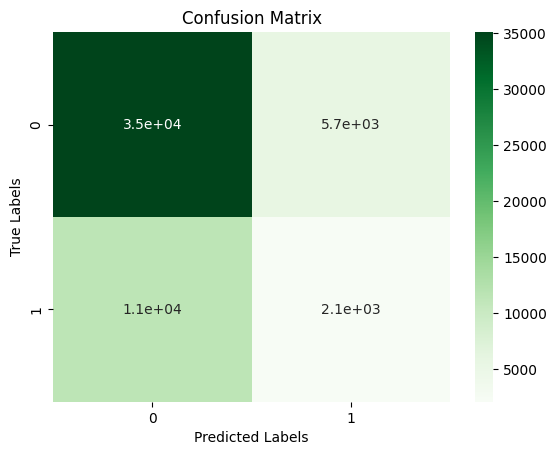

In [123]:
# Plotting the confusion matrix as heatmap
sns.heatmap(confusionMatrix, annot=True, cmap='Greens')


plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

plt.show()


In [124]:

print(classification_report(y_test,predict))

with open('randomForestPre.pkl', 'wb') as f:
    pickle.dump(classification_report(y_test,predict), f)

              precision    recall  f1-score   support

           0       0.75      0.86      0.80     40779
           1       0.27      0.15      0.20     13515

    accuracy                           0.69     54294
   macro avg       0.51      0.51      0.50     54294
weighted avg       0.63      0.69      0.65     54294



# Model 2 - Logistic Regression

In [125]:
logmodel = LogisticRegression(max_iter=100000)
logmodel.fit(X_train,y_train)
with open('logmodel.pkl', 'wb') as f:
    pickle.dump(logmodel, f)
predict = logmodel.predict(X_test)
cols = X_test.columns.tolist()

# print("itssss", cols)

In [126]:
confusionMatrix = confusion_matrix(y_test, predict)
print(confusionMatrix)
print(accuracy_score(y_test, predict))

[[40775     4]
 [13514     1]]
0.7510222123991601


In [127]:
logisticRegressionConfusionMatrix = confusionMatrix

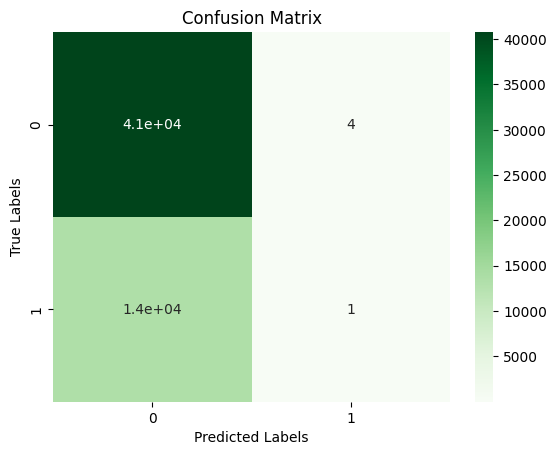

In [128]:
sns.heatmap(confusionMatrix, annot=True, cmap='Greens')


plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

plt.show()


In [129]:
print(classification_report(y_test,predict))
with open('logModelPre.pkl', 'wb') as f:
    pickle.dump(classification_report(y_test,predict), f)

              precision    recall  f1-score   support

           0       0.75      1.00      0.86     40779
           1       0.20      0.00      0.00     13515

    accuracy                           0.75     54294
   macro avg       0.48      0.50      0.43     54294
weighted avg       0.61      0.75      0.64     54294



# Model 3 - Neural Network


In [130]:
clf = MLPClassifier(random_state=1, hidden_layer_sizes=[10,10], max_iter=3000)
clf.fit(X_train, y_train)

with open('clf.pkl', 'wb') as f:
    pickle.dump(clf, f)
predict=clf.predict(X_test)

In [131]:

confusionMatrix = confusion_matrix(y_test, predict)
print(confusionMatrix)


[[40774     5]
 [13514     1]]


In [132]:
print(accuracy_score(y_test, predict))

accuracy = accuracy_score(y_test, predict)*100
print('Accuracy of Neural Networks model is equal ' + str(round(accuracy, 2)) + ' %.')
print(classification_report(y_test,predict))
with open('neuralNetworkPre.pkl', 'wb') as f:
    pickle.dump(classification_report(y_test,predict), f)

0.7510037941577338
Accuracy of Neural Networks model is equal 75.1 %.
              precision    recall  f1-score   support

           0       0.75      1.00      0.86     40779
           1       0.17      0.00      0.00     13515

    accuracy                           0.75     54294
   macro avg       0.46      0.50      0.43     54294
weighted avg       0.61      0.75      0.64     54294



In [133]:
neuralNetworkConfusionMatrix = confusionMatrix

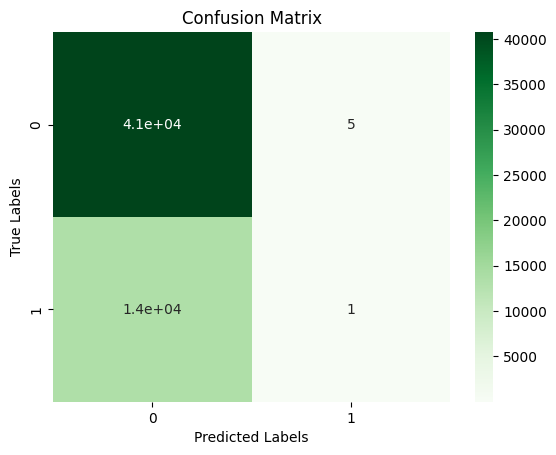

In [134]:
sns.heatmap(confusionMatrix, annot=True, cmap='Greens')


plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

plt.show()

# Model 4 - Naive Bayes Classifier

In [135]:
NB = GaussianNB()
NB.fit(X_train,y_train)
with open('NB.pkl', 'wb') as f:
    pickle.dump(NB, f)
predict=NB.predict(X_test)

In [136]:
cnt = 0
selected_rows = []
for p in range(len(predict)):
    if predict[p] == 1 and X_test.iloc[p][0] >= 0:
        selected_rows.append(X_test.iloc[p])

df = pd.DataFrame(selected_rows)

# Write the dataframe to a CSV file
df.to_csv('selected_rows.csv', index=False)


In [137]:
confusionMatrix = confusion_matrix(y_test, predict)
print(confusionMatrix)
print(accuracy_score(y_test, predict))

[[39749  1030]
 [13050   465]]
0.7406711607175747


In [138]:
naiveBayesConfusionMatrix = confusionMatrix

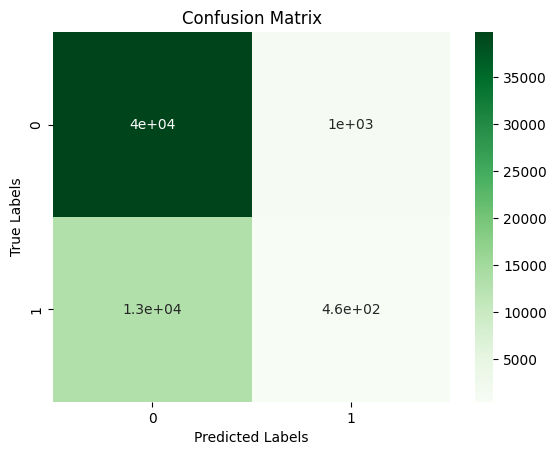

In [139]:
sns.heatmap(confusionMatrix, annot=True, cmap='Greens')


plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

plt.show()

In [140]:
print(classification_report(y_test,predict))
with open('naiveBayesPre.pkl', 'wb') as f:
    pickle.dump(classification_report(y_test,predict), f)

              precision    recall  f1-score   support

           0       0.75      0.97      0.85     40779
           1       0.31      0.03      0.06     13515

    accuracy                           0.74     54294
   macro avg       0.53      0.50      0.46     54294
weighted avg       0.64      0.74      0.65     54294



# Model 5 - Gradient Boosting Classifier

In [141]:
gdboost = GradientBoostingClassifier()
gdboost.fit(X_train,y_train)
with open('gdboost.pkl', 'wb') as f:
    pickle.dump(gdboost, f)
predict=gdboost.predict(X_test)

In [142]:
confusionMatrix = confusion_matrix(y_test, predict)
print(confusionMatrix)
print(accuracy_score(y_test, predict))

[[40713    66]
 [13447    68]]
0.7511143036062917


In [143]:
gdBoostConfusionMatrix = confusionMatrix

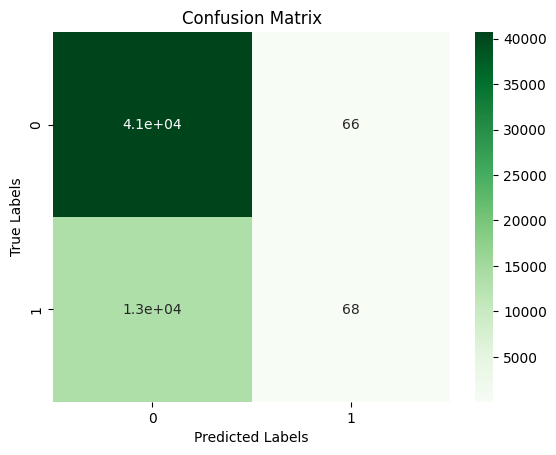

In [144]:
sns.heatmap(confusionMatrix, annot=True, cmap='Greens')


plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

plt.show()

In [145]:
print(classification_report(y_test,predict))
with open('gdBoostPre.pkl', 'wb') as f:
    pickle.dump(classification_report(y_test,predict), f)

              precision    recall  f1-score   support

           0       0.75      1.00      0.86     40779
           1       0.51      0.01      0.01     13515

    accuracy                           0.75     54294
   macro avg       0.63      0.50      0.43     54294
weighted avg       0.69      0.75      0.65     54294



# Model 6 - Decision Tree Classification

In [146]:
tree=DecisionTreeClassifier()
tree.fit(X_train, y_train)
with open('tree.pkl', 'wb') as f:
    pickle.dump(tree, f)
predict = tree.predict(X_test)

In [147]:
confusionMatrix = confusion_matrix(y_test, predict)
print(confusionMatrix)
print(accuracy_score(y_test, predict))

[[29965 10814]
 [ 9643  3872]]
0.6232180351420047


In [148]:
decisionTreeConfusionMatrix = confusionMatrix

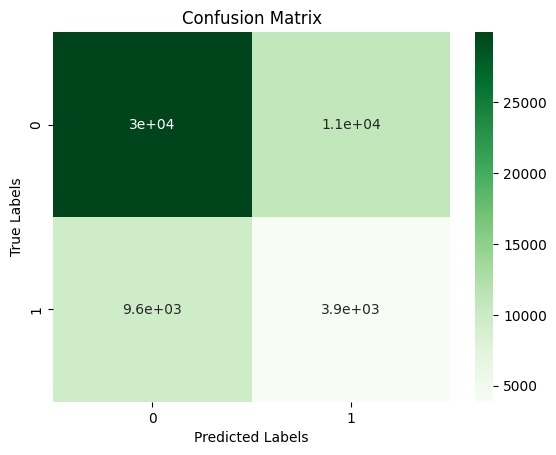

In [149]:
sns.heatmap(confusionMatrix, annot=True, cmap='Greens')


plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

plt.show()

In [150]:
print(classification_report(y_test,predict))
with open('decTreePre.pkl', 'wb') as f:
    pickle.dump(classification_report(y_test,predict), f)

              precision    recall  f1-score   support

           0       0.76      0.73      0.75     40779
           1       0.26      0.29      0.27     13515

    accuracy                           0.62     54294
   macro avg       0.51      0.51      0.51     54294
weighted avg       0.63      0.62      0.63     54294



In [151]:
print("DONE")

DONE


In [152]:
def getLogisticClassification(X_NEW_TEST):
    predict = logmodel.predict(X_NEW_TEST)
    return predict

def getNeuralNetworkClassification(X_NEW_TEST):
    predict = randomForest.predict(X_NEW_TEST)
    return predict

def getRandomForestClassification(X_NEW_TEST):
    predict = clf.predict(X_NEW_TEST)
    return predict

def getNaiveBaseClassification(X_NEW_TEST):
    predict = NB.predict(X_NEW_TEST)
    return predict

def getGDBoostClassification(X_NEW_TEST):
    predict = gdboost.predict(X_NEW_TEST)
    return predict

def getDecisionTreeClassification(X_NEW_TEST):
    predict = tree.predict(X_NEW_TEST)
    return predict